In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy as stats
import matplotlib.pyplot as plt
import random
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import random
random.seed(42)
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preprocessing

## Data Import

In [2]:
df = pd.read_csv(r"C:\Users\johns\OneDrive\Desktop\MBAN Semester 2\Data Science 2\datasets\Customer_Data.csv")

## Data Overview

CUSTID: This is the identification number assigned to each Credit Cardholder. It is a categorical variable.

BALANCE: This refers to the remaining balance in the cardholder's account that can be used for making purchases.

BALANCEFREQUENCY: This is a score between 0 and 1 that indicates how frequently the balance is updated. A score of 1 means the balance is frequently updated while a score of 0 indicates infrequent updates.

PURCHASES: This is the total amount of purchases made from the account.

ONEOFFPURCHASES: Maximum amount of purchase made in a single transaction.

INSTALLMENTSPURCHASES: This indicates the number of purchases made in installments.

CASH ADVANCE: This is the amount of cash in advance given by the user.

PURCHASESFREQUENCY: This is a score between 0 and 1 that indicates how frequently purchases are made from the account. A score of 1 means frequent purchases while a score of 0 indicates infrequent purchases.

ONEOFFPURCHASESFREQUENCY: This is a score between 0 and 1 that indicates how frequently one-off purchases are made. A score of 1 means frequent one-off purchases while a score of 0 indicates infrequent one-off purchases.

PURCHASES INSTALLMENTS FREQUENCY: This is a score between 0 and 1 that indicates how frequently purchases in installments are made. A score of 1 means frequent installment purchases while a score of 0 indicates infrequent installment purchases.

CASHADVANCEFREQUENCY: This is a score between 0 and 1 that indicates how frequently cash in advance is being paid back.

CASHADVANCETRX: This refers to the number of transactions made with "Cash in Advance".

PURCHASESTRX: This is the number of purchase transactions made.

CREDIT LIMIT: This is the credit limit assigned to the user's Credit Card.

PAYMENTS: This is the total amount of payment made by the user.

MINIMUM_PAYMENTS: This is the minimum amount of payment made by the user.

PRCFULLPAYMENT: This indicates the percentage of full payment made by the user.

TENURE: This is the tenure of the credit card service for the user.

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Data Cleaning

In [6]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We will remove the null values from the CREDIT_LIMIT and MINIMUM_PAYMETS columns

In [7]:
df.dropna(inplace= True, axis=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

This only removes 314 values from the dataset and we are still left with 8636 non null values for each variable

# 1. Exploratory Data Analysis (EDA)

## Univariate Analysis

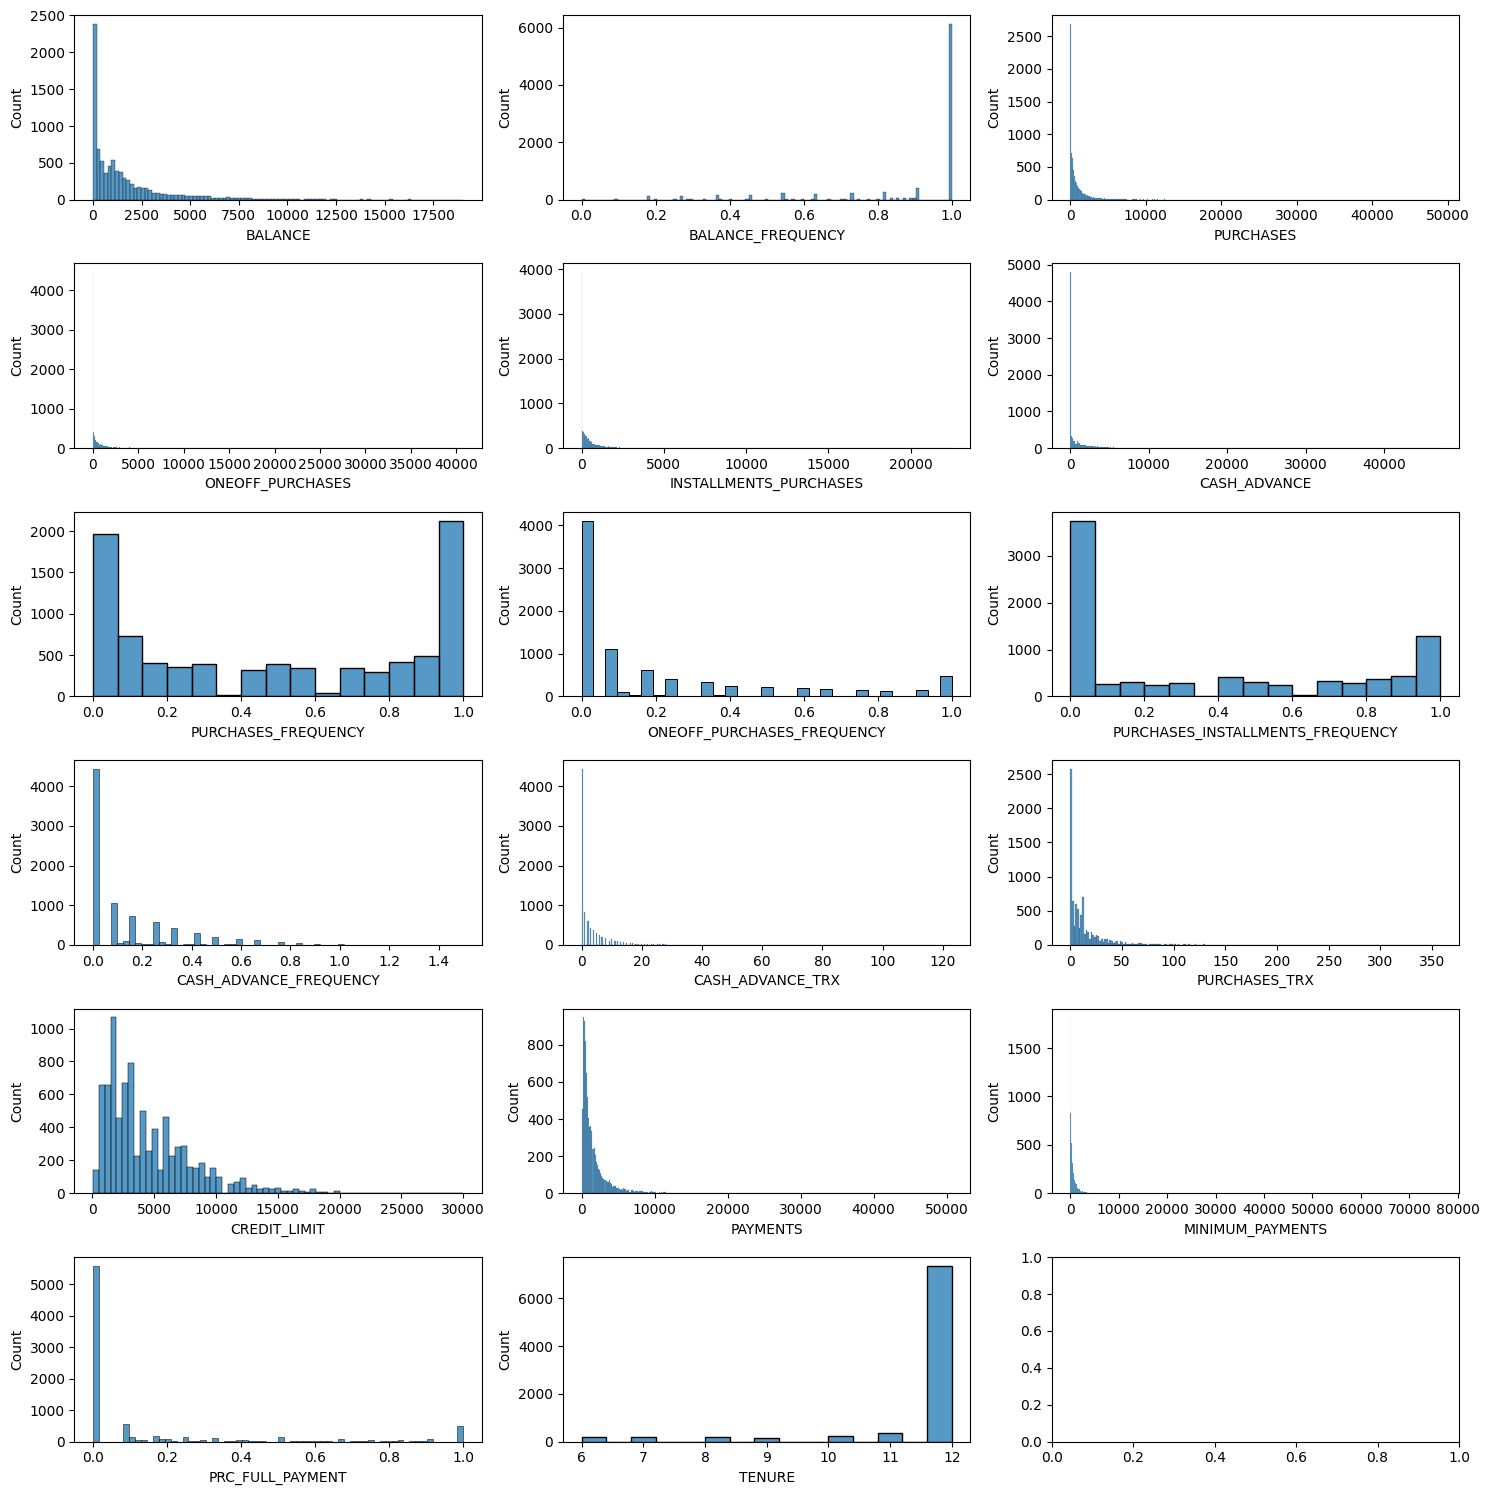

In [9]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, _)) = plt.subplots(6, 3, figsize=(15, 15))

sns.histplot(x=df['BALANCE'], ax=ax1)
sns.histplot(x=df['BALANCE_FREQUENCY'], ax=ax2)
sns.histplot(x=df['PURCHASES'], ax=ax3)
sns.histplot(x=df['ONEOFF_PURCHASES'], ax=ax4)
sns.histplot(x=df['INSTALLMENTS_PURCHASES'], ax=ax5)
sns.histplot(x=df['CASH_ADVANCE'], ax=ax6) 
sns.histplot(x=df['PURCHASES_FREQUENCY'], ax=ax7)
sns.histplot(x=df['ONEOFF_PURCHASES_FREQUENCY'], ax=ax8)
sns.histplot(x=df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=ax9) 
sns.histplot(x=df['CASH_ADVANCE_FREQUENCY'], ax=ax10)
sns.histplot(x=df['CASH_ADVANCE_TRX'], ax=ax11)
sns.histplot(x=df['PURCHASES_TRX'], ax=ax12) 
sns.histplot(x=df['CREDIT_LIMIT'], ax=ax13)
sns.histplot(x=df['PAYMENTS'], ax=ax14) 
sns.histplot(x=df['MINIMUM_PAYMENTS'], ax=ax15)
sns.histplot(x=df['PRC_FULL_PAYMENT'], ax=ax16)
sns.histplot(x=df['TENURE'], ax=ax17) 

plt.tight_layout()
plt.show()

Balance: Most balances are around 0 and this quickly drops off. The higher the balance the lower the amount of people.

Balance Frequency: Most of the balances are updated frequently.

Purchases: In most cases very few purchases are made.

Oneoff Purchases: In most cases very few one off purchases are made.

Installments Purchases: In most cases very few installment purchases are made.

Cash Advance: very few customers give cash in advance.

Purchases Frequency: a score of 0 or one are most common meaning most people either make a lot of purchases or none. 

Oneoff Purchases Frequency: a score of 0 is most common meaning one off purchases are not very popular.

Purchases Installments Frequency: Installments are more popular than oneoff purchases as the value for 1 and many of the values in between are larger.

Cash Advance Freqeuency: Cash in advance is not being paid back very often. 

Cash Advance TRX: Not many purchases are made with cash in advance. 

Purchases TRX: 0 is the largest column but there is an interesting bump around 20 for purchase transactions.

Credit Limit: Credit limit most commonly seems to sit around 1000 which may be what is giving to new users. there are many people within 1000 or so from the 1000 but after that there is a decently large drop off.

Payments: The most common number of payments seems to be between 0 and 1000 and looks to peak around 200.

Minimum Payments: 0 is the most common value for the minimum amount of payment made by the user.

PRC Full Payment: 0% is once again the most common value but there is a decent bimp around 10% and 100%.

Tenure: 12 is the most common value for tenure and most other values are fairly even. 

NOTE: Based on the look of most of the graphs as well there are outlier values as the graphs continue on despite not being any visible values. These graphs would include purchases, one off purchases, installments puRchases, cash advance, cash advance trx, purchases trx, payments, and minimum payments. These outliers we will keep as they appear often enough in each variable to not be a huge concern and if we were to remove them all we would be removing too much of the data. 

NOTE: Cash advance frequency should only have values that fall between 0 and 1. There are some value that fall outside this range so we will remove those.

In [10]:
df[df['CASH_ADVANCE_FREQUENCY'] > 1]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


In [11]:
df.drop(df[df['CASH_ADVANCE_FREQUENCY'] > 1].index, axis=0, inplace=True)

## Bivariate Analysis

### Tenure

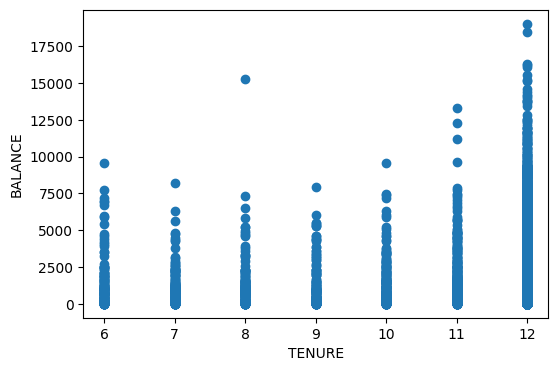

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(df['TENURE'], df['BALANCE'])
plt.xlabel('TENURE')
plt.ylabel('BALANCE')
plt.show()

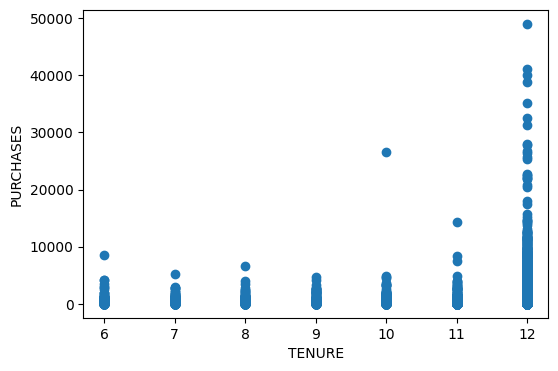

In [13]:
plt.figure(figsize=(6, 4))
plt.scatter(df['TENURE'], df['PURCHASES'])
plt.xlabel('TENURE')
plt.ylabel('PURCHASES')
plt.show()

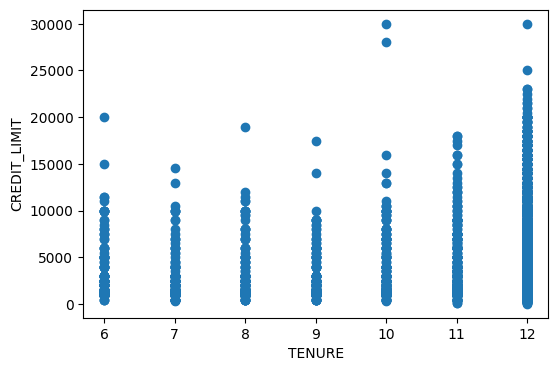

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(df['TENURE'], df['CREDIT_LIMIT'])
plt.xlabel('TENURE')
plt.ylabel('CREDIT_LIMIT')
plt.show()

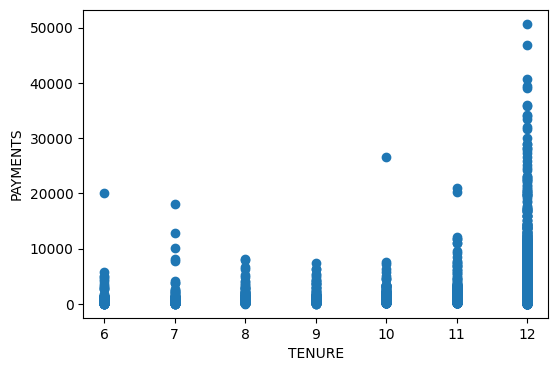

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(df['TENURE'], df['PAYMENTS'])
plt.xlabel('TENURE')
plt.ylabel('PAYMENTS')
plt.show()

### Conclusions

The theme is that the longer the tenure the larger the balance and credit limit

As well people with a longer tenure have more activity in their accounts in terms of payments and purchases

### Balance

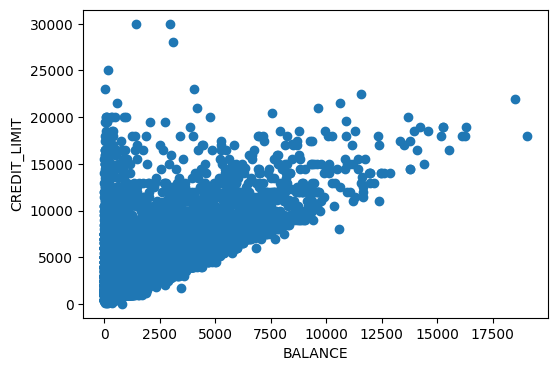

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(df['BALANCE'], df['CREDIT_LIMIT'])
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')
plt.show()

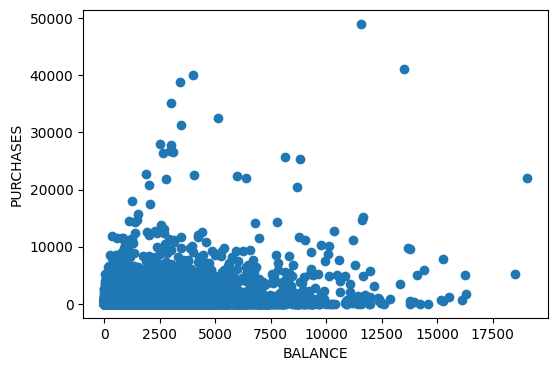

In [17]:
plt.figure(figsize=(6, 4))
plt.scatter(df['BALANCE'], df['PURCHASES'])
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

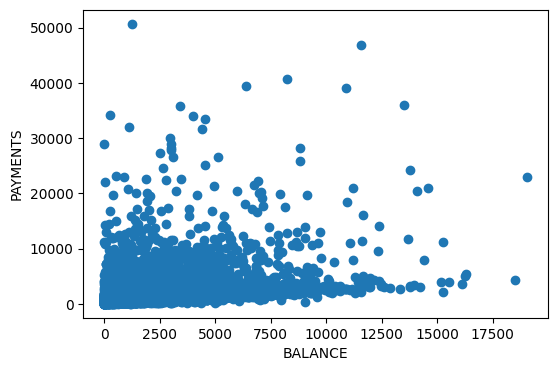

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(df['BALANCE'], df['PAYMENTS'])
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.show()

### Conclusions

The higher the balance gets there seems to be a minimum credit limit that follows it. There are still some outliers with low balances and a high credit limit, this could be someone that generally has a large balance has just made a large purchase and is lower than usual. 

Balance does not seem to have a large impact on the amount of purchases or payments made.

# 3. Clustering Algorithms

In [19]:
num_col = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

df_original = df.copy()

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_col)])
df[num_col] = preprocessor.fit_transform(df[num_col])

In [20]:
df.drop(['CUST_ID'], inplace=True, axis=1)

### Principal Component Analysis (PCA)

We will then complete PCA. This will ensure we are only keeping the important information within our dataset. We want to run the code and see where a large portion of our total variance can be attributed and choose to keep that many components.

In [21]:
pca = PCA()
df_pca = pca.fit_transform(df)

pca_columns = [f'PC{i + 1}' for i in range(len(df.columns))]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
output_df = pd.DataFrame({'Explained Variance Ratio': explained_variance, 'Cumulative Explained Variance Ratio': cumulative_variance})
print(output_df)

    Explained Variance Ratio  Cumulative Explained Variance Ratio
0               2.722857e-01                             0.272286
1               2.037748e-01                             0.476061
2               8.923960e-02                             0.565300
3               7.570749e-02                             0.641008
4               6.271420e-02                             0.703722
5               5.716640e-02                             0.760888
6               4.922563e-02                             0.810114
7               4.212406e-02                             0.852238
8               3.684113e-02                             0.889079
9               3.074444e-02                             0.919824
10              2.361678e-02                             0.943440
11              1.775715e-02                             0.961197
12              1.428143e-02                             0.975479
13              1.175453e-02                             0.987233
14        

We will choose to go with 9 as that is where over 90% of the total variance can be attributed. This maximizes the tradeoff between the number of components and the amount of explained variance.  

In [22]:
df_pca = df_pca.iloc[:,0:9]

## KMeans Clustering

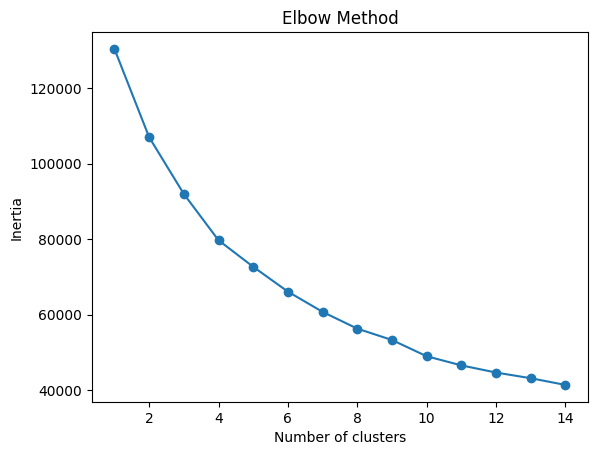

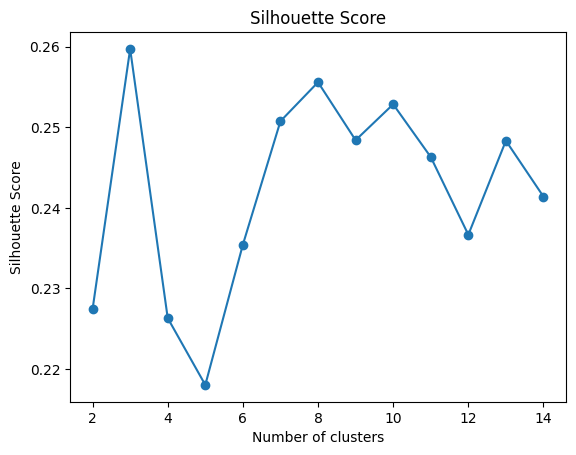

In [23]:
inertia = []
silhouette_avg = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
    klabels = kmeans.labels_
    centers = kmeans.cluster_centers_

    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(df_pca, klabels)]

# Silhouette Score
plt.plot(range(1, 15), inertia,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
 
plt.plot(range(2, 15), silhouette_avg,marker = 'o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Based on the above scored, we will proceed with 6 clusters as it is where the Elbow method begins to flatten more than before and has a higher silhouette score than 4 or 5 where there is also more flattening in the elbow curve.

In [24]:
K = 6
kmeans = KMeans(n_clusters=K, random_state=0).fit(df_pca)
klabels = kmeans.labels_

silhouette_score is:  0.23543697161507163


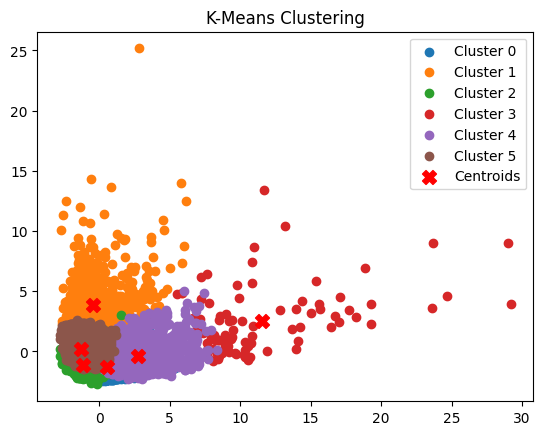

In [25]:
ss_kmeans = metrics.silhouette_score(df_pca, klabels, metric='euclidean')

print("silhouette_score is: ", ss_kmeans)

x_values = df_pca.iloc[:, 0].values
y_values = df_pca.iloc[:, 1].values

centroids = kmeans.cluster_centers_

for cluster_label in set(klabels):
    cluster_x = x_values[klabels == cluster_label]
    cluster_y = y_values[klabels == cluster_label]
    plt.scatter(cluster_x, cluster_y, label=f'Cluster {cluster_label}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.title('K-Means Clustering')
plt.legend()
plt.show()

## DBSCAN Clustering

DBSCAN Silhouette Score: 0.6445424899630945


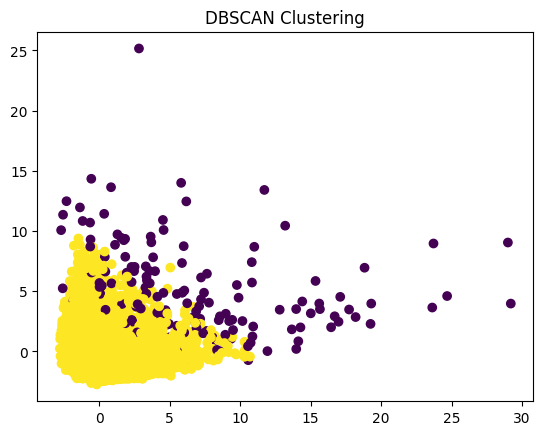

In [26]:
dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca)

if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(df_pca, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

x_values = df_pca.iloc[:, 0].values
y_values = df_pca.iloc[:, 1].values

plt.scatter(x_values,y_values, c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

## Hierarchial Clustering

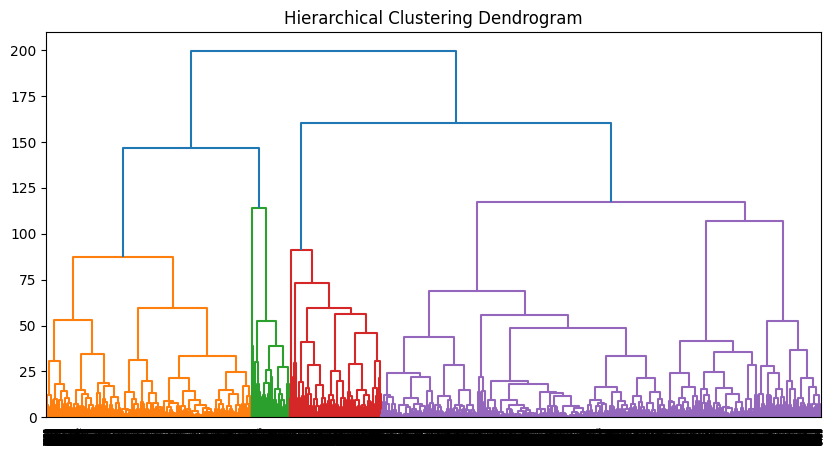

In [27]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(df_pca, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Based on the above visualization we can see there are four distinct clusters as shown by the four different colors. For that reason we will set n_clusters equal to 4 in the next part of the code

silhouette_score is:  0.18408370114436814


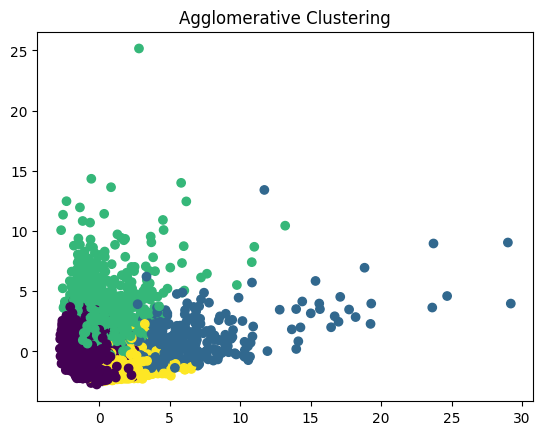

In [28]:
agglomerative = AgglomerativeClustering(n_clusters=4)
alabels = agglomerative.fit_predict(df_pca)

ss_agglomerative = metrics.silhouette_score(df_pca, alabels, metric='euclidean')
print("silhouette_score is: ", ss_agglomerative)

x_values = df_pca.iloc[:, 0].values
y_values = df_pca.iloc[:, 1].values

plt.scatter(x_values,y_values, c=alabels)
plt.title('Agglomerative Clustering')
plt.show()

## Affinity Propagation Clustering

Affinity Propagation Silhouette Score: 0.15539265305025965


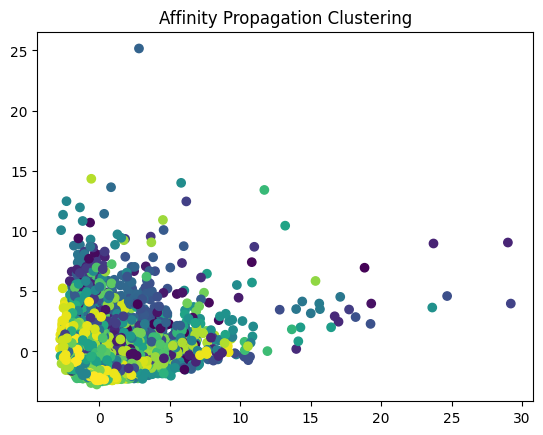

In [29]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(df_pca)

# Silhouette Score
af_sil_score = silhouette_score(df_pca, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

x_values = df_pca.iloc[:, 0].values
y_values = df_pca.iloc[:, 1].values

plt.scatter(x_values,y_values, c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()

# 4. Interpreting Clusters

Despite DBSCAN having a much higher silhouette score there is a lot of overlap and there is no distinct clusters

Kmeans has a higher score than all other models but also has multiple clusters that are distinctly seperated from one another

In [30]:
df_original['CLUSTER'] = klabels

In [31]:
df_original.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,4
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,5
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


In [32]:
cluster_sizes = df_original['CLUSTER'].value_counts()

In [33]:
sorted_cluster_sizes = dict(sorted(cluster_sizes.items()))
for cluster_label, size in sorted_cluster_sizes.items():
    print(f"Cluster {cluster_label}: {size} data points")

Cluster 0: 2138 data points
Cluster 1: 943 data points
Cluster 2: 1189 data points
Cluster 3: 88 data points
Cluster 4: 1278 data points
Cluster 5: 2992 data points


Here we see that our largest clusters are cluster 5 with around 3000 values. Cluster 0 is the next largest containing just over 2100 data points. Following this we have cluster 1, 2, and 4 which all have around 1000 values. Finally, cluster 3 is the smallest cluster by a large margin only containing 88 data points.

In [34]:
df_original.drop(['CUST_ID'], inplace=True, axis=1)

We then dropped the non numeric column of CUST_ID

In [35]:
df_original.groupby('CLUSTER').mean().T

CLUSTER,0,1,2,3,4,5
BALANCE,743.467783,4855.045583,143.790216,4566.075524,1864.272145,1559.974463
BALANCE_FREQUENCY,0.958286,0.966852,0.438738,0.977169,0.979235,0.969926
PURCHASES,904.125281,556.460148,365.759899,15545.461136,2978.126886,263.294342
ONEOFF_PURCHASES,184.406394,339.027052,226.528427,10504.035682,2090.903638,214.879649
INSTALLMENTS_PURCHASES,720.557652,217.540912,139.481093,5041.425455,887.223247,48.580094
CASH_ADVANCE,205.575649,5110.527804,340.692954,1037.118534,331.569503,794.517208
PURCHASES_FREQUENCY,0.887582,0.309328,0.278785,0.929735,0.926747,0.165529
ONEOFF_PURCHASES_FREQUENCY,0.094651,0.145307,0.085821,0.756164,0.755067,0.101640
PURCHASES_INSTALLMENTS_FREQUENCY,0.827018,0.203565,0.183167,0.786467,0.579924,0.065798
CASH_ADVANCE_FREQUENCY,0.041903,0.510352,0.038302,0.084280,0.055637,0.161730


The mean values for each of the clusters across each of the columns changes by a fairly significant margin in each of the columns. 

Balance: The balance for cluster 1 and 3 is significantly higher than any other cluster. Cluster 2 has the lowest average balance

Balance Frequency: The balance frequency is high for all clusters except cluster 2. This could relate to that cluster having the lowest balances. 

Purchases: The number of purchases for cluster 3 is huge in comparision to all other clusters. Cluster 4 still has a lot then all other clusters are below 1000.

Oneoff Purchases: Oneoff purchases follow a similar trend to purchases across each cluster. 

Installments Purchases: These also follow the trend for purchases. However, Cluster 0 is the only cluster that has more installment purchases. 

Cash Advance: Cluster 1 contains the most people that pay with cash in advance. 

Purchases Frequency: The purchase frequency for cluster 0, 3, and 4 all have high purchase freqeuency where 1, 2, and 5 all have low purchase frequency.

Oneoff Purchases Frequency: Cluster 3 and 4 have a high one off purchase frequency where all other clusters have a value close to 0.1.

Purchases Installments Frequency: Cluster 0 and 3 have the highest installment purchase frequency as it is close to 1. This is followed by cluster 4 who has a value around 0.6. All others have low frequency.

Cash Advance Freqeuency: Cluster 1 pays cash in advance much more frequently than any other cluster.

Cash Advance TRX: Cluster 1 also has the highest value in this variable by far.

Purchases TRX: Cluster 3 has the most purchase transactions which lines up with the purchases column. 

Credit Limit: Cluster 3 has the highest credit limit by a large margin. Cluster 1 and 4 have the next highest at 3 and 4 thousand. Cluster 0, 2, and 5 have the lowest at around 1000.

Payments: Cluster 3 also makes the most payments

Minimum Payments: Cluster 3 also has the highest value in this value. 

PRC Full Payment: All of these values are consistent across all clusters. 

Tenure: The tenure for all of the clusters is close to 12. There is not large difference in this field 

### Conclusions

Cluster 0 is distint in the way its the only cluster where its customers prefer installment purchases over one off purchases. 

Cluster 1 is an interesting cluster as it has the highest average balance but is unique in the way that its customers seem to much prefer cash advance payments 

Cluster 2 proably represents the opposite as they have the lowest average balance and make the least purchases. 

Cluster 3 is one of the smallest clusters but manages to have one of the highest average balances, highest average purchases, and payments. This cluster probably represents the most wealthy clients that spend the most money. 

Cluster 4 seems to be a very middle ground cluster, none of its values really stick out or are much higher than any other cluster.

Cluster 5 is a cluster with a decently large balance but makes very few purchases. This would not be a very attractive segment for a credit card company to look into.

With this in mind we will look further into some of the most interesting variables from the above analysis to come up with our conclusions and recomendations. The variables we will look at will be Balance, Purchases, Credit_Limit, Cash_advance, and Payments

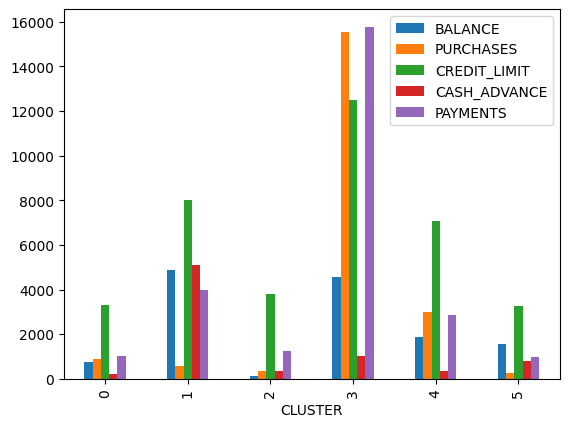

In [36]:
cluster_data = df_original[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE', 'PAYMENTS', 'CLUSTER']].groupby('CLUSTER').mean()
cluster_data.plot.bar()
plt.show()

### Conclusions

The graph created just reinsures some of the conclusions made above

Cluster 0 has one of the lowest credit limits which is most likely fueled by their small balance. They make more purchases than most of the other customers with a balance similar to theirs. They do not like paying with cash in advance. This is not a very attractive customer segment as they are people who dont have a lot of money but like to spend. This could cause issues. 

Cluster 1 contains customers with a large credit limit and large balance. They pay mainly with cash in advance and make a good amount of payments overall. These are good customers for a credit card company as they generally pay in advance and there is not as many issues with people not paying their credit card. 

Cluster 2 contains people with very low balances, they dont make many payments or purchases. This is not a very attractive customer segment for a credit card company as the upside to these customers is not very high 

Cluster 3 makes the most purchases of any of the other clusters, this cluster includes customers with a fairly large balance that likes to make a lot of purchases, for this reason they have a large credit limit and also make a lot of purchases. This is a very attractive customer base for a credit card company as it is people that like to spend and use their card and make a lot of purchases. 

Cluster 4 would have customers with not a large average budget but like to make a lot of purchases. They have a high credit limit which would lead me to believe these are people that keep a low balance as they are purchasing items often. This is a good segment for a credit card company.

Cluster 5 has customers with a low balance that does not make a lot of purchases but they do pay in advance often. For this reason there is not huge upside to this cluster but they are fairly safe for a credit card company to sell to. 


# 5. Actionable Insights

Based on the analysis of the clusters I have one recommendation for each cluster

Cluster 0: Create a program for people that make a lot of purchases. This could be a points system or a cash back system at each purchase. This would attract a lot more customers and help customers with lower balances save money in the long run. 

Cluster 1: Could create benefits for certain purchase targets. These customers have high balances but decide not to make many purchases. Maybe if their was an incentive system it could encourage them to make more purchases on their credit card if they knew they were building towards something beneficial. 

Cluster 2: Create a specific card to help people in this low bracket. Maybe since they have low balances you can try to attract them with benefits or points centered around necessities. Someone with a bit more money could be attracted with vacation point or more luxury rewards but someone with a smaller balance is probably more concerend with saving money when it comes to what they need. 

Cluster 3: This segment already makes a lot of purchases. What the goal with this segment could be would be to try to get them to pay more in advance. This would make them a more attractive segment. Offer information regarding the benefits of cash advances and provide special promotions or rewards for those clients that use cash advances effectively. 

Cluster 4: This segment has a low balance but a very high credit_limit. They also make a lot of purchases compared to other segments. For this reason the company may want to look to lower the credit limit of this sector to protect against them going above it. Because of the low balances they may not be able to maintain such a high credit limit and there is no real reason to have that there in the first place. 

Cluster 5: This cluster has a decent balance but makes very few purchases with their credit cards. For this reason they may want to try to create a promotion to encourage more purchases using their card. This would help this segment become more beneficial to the credit card company overall. 